In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as st

In [2]:
np.random.seed(99)

### plot poisson distributions ( mu = 1/4/10 )

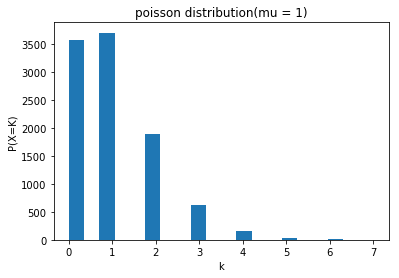

In [3]:
poisson1 = st.poisson.rvs(mu = 1, size = 10000)
plt.hist(poisson1, bins = 20)
plt.xlabel('k')
plt.ylabel('P(X=K)')
plt.title('poisson distribution(mu = 1)')

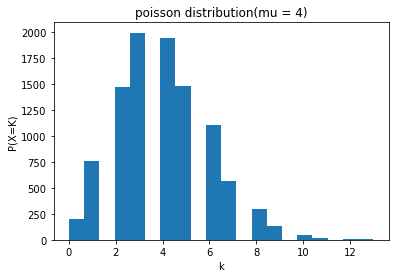

In [4]:
poisson2 = st.poisson.rvs(mu = 4, size = 10000)
plt.hist(poisson2, bins = 20)
plt.xlabel('k')
plt.ylabel('P(X=K)')
plt.title('poisson distribution(mu = 4)')

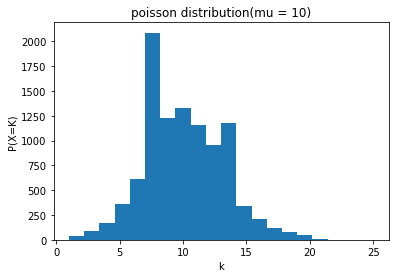

In [5]:
poisson3 = st.poisson.rvs(mu = 10, size = 10000)
plt.hist(poisson3, bins = 20)
plt.xlabel('k')
plt.ylabel('P(X=K)')
plt.title('poisson distribution(mu = 10)')

### Generate 100 samples from a poisson distribution with mean 10: X ~ P(10). All samples have the same size 1000

In [6]:
sample100 = 100
mysize = 1000
mylam = 10
pois_sample100 = []
for i in range(sample100):
    pois_sample100.append(np.random.poisson(lam = mylam, size = mysize))

### calculate the mean of each sample

In [7]:
pois_sample100_mean = []
for i in range(len(pois_sample100)):
    pois_sample100_mean.append(pois_sample100[i].mean())

(array([  1.,   7.,  12.,  15.,  21.,  18.,  10.,   9.,   5.,   2.]),
 array([  9.735 ,   9.7876,   9.8402,   9.8928,   9.9454,   9.998 ,
         10.0506,  10.1032,  10.1558,  10.2084,  10.261 ]),
 <a list of 10 Patch objects>)

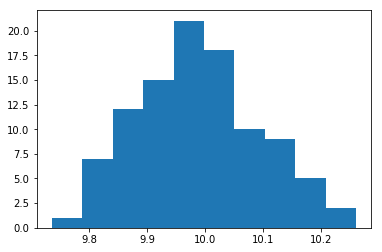

In [8]:
plt.hist(pois_sample100_mean)

### plot three of the samples

(array([   1.,    7.,   14.,   37.,   66.,   91.,  116.,  124.,  132.,
           0.,  133.,   86.,   55.,   47.,   49.,   23.,   11.,    5.,
           2.,    1.]),
 array([  2. ,   2.9,   3.8,   4.7,   5.6,   6.5,   7.4,   8.3,   9.2,
         10.1,  11. ,  11.9,  12.8,  13.7,  14.6,  15.5,  16.4,  17.3,
         18.2,  19.1,  20. ]),
 <a list of 20 Patch objects>)

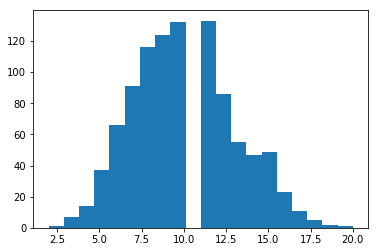

In [9]:
plt.hist(pois_sample100[20], bins = 20)

(array([   3.,   13.,   19.,   47.,   43.,   96.,  234.,  100.,   96.,
          96.,   78.,   70.,   33.,   52.,    7.,    7.,    2.,    1.,
           2.,    1.]),
 array([  1.  ,   2.15,   3.3 ,   4.45,   5.6 ,   6.75,   7.9 ,   9.05,
         10.2 ,  11.35,  12.5 ,  13.65,  14.8 ,  15.95,  17.1 ,  18.25,
         19.4 ,  20.55,  21.7 ,  22.85,  24.  ]),
 <a list of 20 Patch objects>)

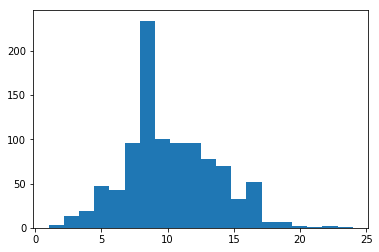

In [10]:
plt.hist(pois_sample100[50], bins = 20)

(array([   3.,    8.,   25.,   43.,   50.,   85.,  111.,  121.,  116.,
         101.,   87.,   75.,   70.,   42.,   31.,   19.,    5.,    6.,
           1.,    1.]),
 array([  2.  ,   2.95,   3.9 ,   4.85,   5.8 ,   6.75,   7.7 ,   8.65,
          9.6 ,  10.55,  11.5 ,  12.45,  13.4 ,  14.35,  15.3 ,  16.25,
         17.2 ,  18.15,  19.1 ,  20.05,  21.  ]),
 <a list of 20 Patch objects>)

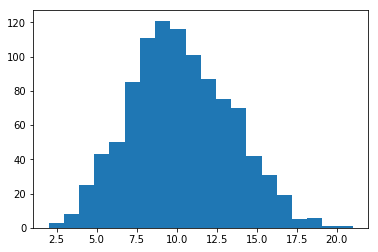

In [11]:
plt.hist(pois_sample100[80], bins = 20)

### plot the distribution of z statistics

In [12]:
def calculate_z(x, mean, std):
    z = (x.mean() - mean)/(std/np.sqrt(len(x)))
    return z

In [13]:
calculate_z(pois_sample100[50], mylam, np.sqrt(mylam))

2.0100000000000051

In [14]:
pois_sample100_z = []
for i in range(len(pois_sample100)):
    pois_sample100_z.append(calculate_z(pois_sample100[i], mylam, np.sqrt(mylam)))

(array([  1.,   0.,   1.,   6.,   6.,   6.,   8.,   7.,   9.,  12.,  10.,
          8.,   2.,   8.,   7.,   2.,   3.,   2.,   1.,   1.]),
 array([-2.65 , -2.387, -2.124, -1.861, -1.598, -1.335, -1.072, -0.809,
        -0.546, -0.283, -0.02 ,  0.243,  0.506,  0.769,  1.032,  1.295,
         1.558,  1.821,  2.084,  2.347,  2.61 ]),
 <a list of 20 Patch objects>)

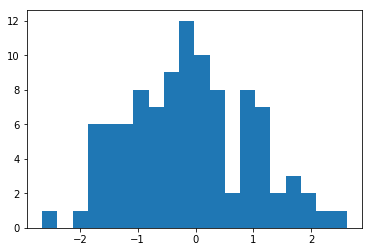

In [15]:
plt.hist(pois_sample100_z, bins = 20)

### fit the z-statistics with a gaussian model and assess the goodness of fit with KS test

In [16]:
st.kstest(pois_sample100_z, 'norm')

KstestResult(statistic=0.10828321334543933, pvalue=0.178141453612638)

### the null hypothesis of KS test is the two distributions are identical
### pvalue > 0.1, meaning that the K-S test does not reject the hypothesis that the z-statistics came from the normal distribution


# we could repeat the process above 100 times, to see whether the pvalue changes and does it always larger than 0.1 or 0.05 according to relevant significant level

In [17]:
def kstest_zofpois_norm(sample = 100, lam = 10, size = 1000):
    sample_list = []
    for i in range(sample):
        sample_list.append(np.random.poisson(lam, size))

    z_list = []
    for i in range(sample):
        z_list.append(calculate_z(sample_list[i], mean = lam, std = np.sqrt(lam)))
    return st.kstest(z_list, 'norm')
    

In [18]:
kstest_zofpois_norm(sample = 100, lam = 10, size = 1000)

KstestResult(statistic=0.099999999999999978, pvalue=0.25318131691256385)

(array([  5.,   7.,   5.,   3.,   7.,   4.,   3.,   4.,   2.,   6.,   5.,
         16.,   3.,   2.,   1.,   6.,   3.,   6.,   7.,   5.]),
 array([ 0.0010791 ,  0.05099293,  0.10090677,  0.15082061,  0.20073444,
         0.25064828,  0.30056212,  0.35047595,  0.40038979,  0.45030363,
         0.50021746,  0.5501313 ,  0.60004514,  0.64995897,  0.69987281,
         0.74978665,  0.79970048,  0.84961432,  0.89952815,  0.94944199,
         0.99935583]),
 <a list of 20 Patch objects>)

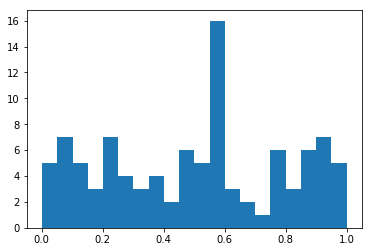

In [19]:
kstest_pvalue = []
for i in range(100):
    kstest_pvalue.append(kstest_zofpois_norm(sample = 100, lam = 10, size = 1000)[1])
plt.hist(kstest_pvalue, bins = 20)

In [20]:
sum(np.array(kstest_pvalue) > 0.1)/100

0.88

In [21]:
sum(np.array(kstest_pvalue) > 0.05)/100

0.94999999999999996

### one more experiments if the sample numbers = 1000 AND repeat 1000 times?

In [22]:
kstest_zofpois_norm(sample = 1000, lam = 10, size = 100)

kstest_pvalue2 = []
for i in range(1000):
    kstest_pvalue2.append(kstest_zofpois_norm(sample = 1000, lam = 10, size = 1000)[1])
    


In [23]:
sum(np.array(kstest_pvalue2) > 0.1)/1000

0.88800000000000001

In [24]:
sum(np.array(kstest_pvalue2) > 0.05)/1000

0.95499999999999996

## the pvalue of kstest 88%  > 0.1, 95% > 0.05,  accordant with the probablities of hypothesis 

# Conclusions:

## z-statistics of samples generated from poisson distribution follow a N(0,1) distribution
